# Text Classification Challenge

## Overview

Welcome to the Text Classification Challenge! In this task, you will develop a machine learning model to classify IMDb movie reviews into positive or negative sentiments. The challenge is designed to help you demonstrate your skills in natural language processing (NLP) and your ability to work with state-of-the-art transformer models.

### Problem Statement

The task is to build a text classification model that accurately predicts whether a given movie review expresses a positive or negative sentiment. Sentiment analysis is a critical task in NLP with applications in marketing, customer feedback, social media monitoring, and more. Accurately classifying sentiments can provide valuable insights into customer opinions and help businesses make data-driven decisions.

### Why This Task is Important

Understanding customer sentiment through text data is crucial for businesses and organizations to respond effectively to customer needs and preferences. By automating the sentiment analysis process, companies can efficiently analyze vast amounts of data, identify trends, and make informed strategic decisions. For this challenge, we will use the IMDb dataset, a widely-used benchmark in sentiment analysis, to train and evaluate our model.

## Dataset Description

The dataset used for this challenge is the IMDb movie reviews dataset, which contains 50,000 reviews labeled as either positive or negative. This dataset is balanced, with an equal number of positive and negative reviews, making it ideal for training and evaluating sentiment analysis models.

- **Columns:**
  - `review`: The text of the movie review.
  - `sentiment`: The sentiment label (`positive` or `negative`).

The IMDb dataset provides a real-world scenario where understanding sentiment can offer insights into public opinion about movies, directors, and actors, as well as broader trends in the entertainment industry.

## Approach

Transformers have revolutionized NLP by allowing models to consider the context of a word based on surrounding words, enabling better understanding and performance on various tasks, including sentiment analysis. Their ability to transfer learning from massive datasets and adapt to specific tasks makes them highly effective for text classification.

## Your Task

You are required to implement a transformer-based model for sentiment classification on the IMDb dataset. Follow the steps below to complete the challenge:

1. **Data Exploration and Preprocessing:**
   - Load the dataset and perform exploratory data analysis (EDA) to understand its structure.
   - Preprocess the data by cleaning text, encoding labels, and splitting into training and test sets.

2. **Model Implementation:**
   - Implement a transformer-based model for sentiment classification. You should consider writing Transformer blocks from scratch.
   - Implement data loaders and training loops using a deep learning framework like PyTorch or TensorFlow.

3. **Training and Evaluation:**
   - Train your model and optimize hyperparameters for the best performance.
   - Evaluate the model using appropriate metrics.

4. **Documentation:**
   - Document your approach, experiments, and results.
   - Discuss any challenges faced and propose potential improvements.

5. **Prediction and Inference:**
    - Implement a function that takes a movie review as input and predicts the sentiment (positive or negative).
    - Test the function with custom reviews and display the predicted sentiment.

6. **Model Deployment:**
    - Save the trained model and any other necessary files.
    - Prepare the model for deployment (e.g., using Flask or FastAPI).
    - Prepare a basic front-end interface for the deployed model.

7. **Submission:**
    - Create a GitHub repository for your code.
    - Write a detailed README.md file with instructions on how to train, evaluate, and use the model.
    - Include a summary of your approach and the results in the README file.
    - Your code should be well-documented and reproducible.
    - Your repository should include a notebook showcasing the complete process, including data loading, preprocessing, model implementation, training, and evaluation.
    - Apart from the notebook, you should also have all the codes in .py files so that it can be easily integrated with the API.
    - You submission should also include a python script for the API.
    - Your submission should also include a basic front-end for the deployed model.
    - Submit the GitHub repository link.

## Getting Started

To get started, follow the structure provided in this notebook, complete each step, and explore additional techniques to enhance your model's performance. Make sure to document your findings and prepare a comprehensive report on your work.

Good luck, and welcome to RealAI!


# Data Exploration and Preprocessing

Let's start by loading the dataset and performing some exploratory data analysis (EDA) to understand its structure and characteristics.
You can download the dataset from the following link: https://drive.google.com/file/d/1aU7Vv7jgodZ0YFOLY7kmSjrPcDDwtRfU/view?usp=sharing

You should provide all the necessary reasoning and code to support your findings.

Finally, you should apply the required preprocessing steps to prepare the data for training the sentiment classification model.

In [48]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

df = pd.read_csv('IMDB Dataset.csv')  # adjust if path differs
print("Shape:", df.shape)
df.head()

Shape: (50000, 2)


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue i...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenl...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what mone...",positive


In [49]:
#check structure and types
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
#remove duplicates
df = df.drop_duplicates().reset_index(drop=True)
print("Shape after removing duplicates:", df.shape)


Info:
<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   review     50000 non-null  str  
 1   sentiment  50000 non-null  str  
dtypes: str(2)
memory usage: 781.4 KB
None

Missing values:
review       0
sentiment    0
dtype: int64

Duplicate rows: 418
Shape after removing duplicates: (49582, 2)


In [50]:
#text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', ' ', text) #remove HTML tags like <br />
    text = re.sub(r'http\S+', '', text) #remove URLs if present
    text = re.sub(r'[^a-zA-Z\s]', '', text) #only alphabets
    text = text.lower() #convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip() #remove extra spaces
    return text
#apply cleaning
df['clean_review'] = df['review'].apply(clean_text)
df[['review','clean_review']].head()

,review,clean_review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me...",one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its...
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire p...",a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors ar...
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue i...",i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is wi...
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenl...,basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the time this movie is slower than a soap opera and suddenly jake decides to bec...
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what mone...",petter matteis love in the time of money is a visually stunning film to watch mr mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money powe...


In [51]:
df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1}) #encoding + splits
train_text, temp_text, train_labels, temp_labels = train_test_split(
    df['clean_review'], df['label'],
    test_size=0.30, random_state=42, stratify=df['label']
)
val_text, test_text, val_labels, test_labels = train_test_split(
    temp_text, temp_labels,
    test_size=0.50, random_state=42, stratify=temp_labels
)
print("Train:", len(train_text), "Val:", len(val_text), "Test:", len(test_text))
print("Label check:", df['label'].value_counts().to_dict())

Train: 34707 Val: 7437 Test: 7438
Label check: {1: 24884, 0: 24698}


sentiment
positive    24884
negative    24698
Name: count, dtype: int64


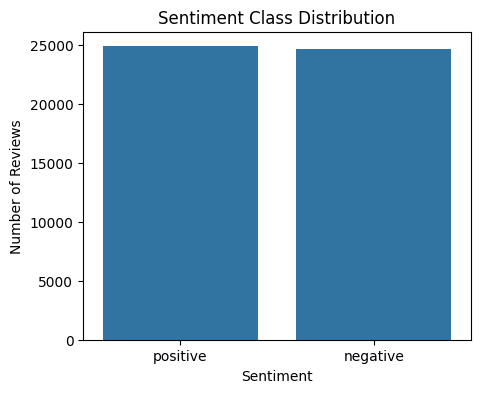

In [52]:
#sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
#plot for report better visualization
plt.figure(figsize=(5,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Class Distribution")
plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment")
plt.show()

# Model Implementation

You are required to implement a transformer-based model for sentiment classification from scratch. You can use libraries like PyTorch or TensorFlow to implement the model architecture and training process.

You should include the architecture figure of the proposed model and provide a detailed explanation of why you chose this architecture.

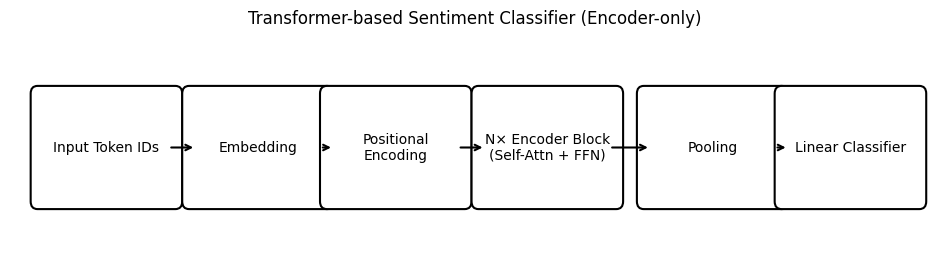

In [53]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
#transformer-based sentiment classification model
def draw_transformer_architecture():
    #create a wide canvas so blocks can be spaced out horizontally
    plt.figure(figsize=(12, 3))
    ax = plt.gca()
    ax.axis("off")   #remove axes for clean diagram look

    blocks = [
        ("Input Token IDs", 0.5),  #blocks represent the forward flow of the model
        ("Embedding", 2.7),  #each tuple = (block label, x position)
        ("Positional\nEncoding", 4.7),               
        ("N× Encoder Block\n(Self-Attn + FFN)", 6.9),
        ("Pooling", 9.3),                            
        ("Linear Classifier", 11.3),                  
    ]
#draw each block as a rounded rectangle
    for label, x in blocks:
        rect = FancyBboxPatch(
            (x, 0.9),          
            1.8, 1.2,     
            boxstyle="round,pad=0.2,rounding_size=0.1",
            linewidth=1.5,
            edgecolor="black",
            facecolor="white"
        )
        ax.add_patch(rect)
        ax.text(x + 0.9, 1.5, label,
                ha="center", va="center", fontsize=10)

    for i in range(len(blocks) - 1): #draw arrows between blocks to show forward flow
        x1 = blocks[i][1] + 1.8  
        x2 = blocks[i+1][1]   
        ax.annotate(
            "", xy=(x2, 1.5), xytext=(x1, 1.5),
            arrowprops=dict(arrowstyle="->", lw=1.5)
        )
    #adjust limits so diagram fits nicely
    ax.set_xlim(0, 13.5)
    ax.set_ylim(0, 3)

    plt.title("Transformer-based Sentiment Classifier (Encoder-only)")
    plt.show()
draw_transformer_architecture()

In [54]:
import torch #Transformer Model
import torch.nn as nn
#sinusoidal Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=512):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len).unsqueeze(1).float()
        div = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(pos * div)
        pe[:, 1::2] = torch.cos(pos * div)
        self.register_buffer("pe", pe.unsqueeze(0))  # (1, max_len, d_model)

    def forward(self, x):
        return x + self.pe[:, :x.size(1), :]
#encoder Block
class EncoderBlock(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, dropout=0.1):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(d_model, n_heads, batch_first=True, dropout=dropout)
        self.ffn = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(d_ff, d_model)
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.drop = nn.Dropout(dropout)
    def forward(self, x, attn_mask):
#(B,T) True for real tokens, MultiheadAttention needs True for padding, so we invert the mask
        pad_mask = ~attn_mask
        attn_out, _ = self.self_attn(x, x, x, key_padding_mask=pad_mask, need_weights=False)
        x = self.norm1(x + self.drop(attn_out))
        ffn_out = self.ffn(x)
        x = self.norm2(x + self.drop(ffn_out))
        return x
#transformer Classifier
class TransformerSentimentClassifier(nn.Module):
    def __init__(self, vocab_size, d_model=128, n_heads=4, n_layers=2, d_ff=256, dropout=0.1, num_classes=2):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, d_model)
        self.pos   = PositionalEncoding(d_model)

        self.encoder = nn.ModuleList([
            EncoderBlock(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)
        ])

        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, input_ids, attn_mask):
        #input_ids
        x = self.embed(input_ids)
        x = self.pos(x)
        for layer in self.encoder:
            x = layer(x, attn_mask)
        #masked mean pooling to get sentence representation
        mask_f = attn_mask.float().unsqueeze(-1)   # (B,T,1)
        pooled = (x * mask_f).sum(dim=1) / mask_f.sum(dim=1).clamp(min=1.0)
        logits = self.fc(self.dropout(pooled))
        return logits

In [55]:
#minimal training step function
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    for input_ids, attn_mask, labels in loader:
        input_ids, attn_mask, labels = input_ids.to(device), attn_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(input_ids, attn_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

## why this architecture?

1. Encoder only Transformer is ideal because sentiment classification needs contextual understanding, not text generation, so a decoder is unnecessary.
2. Multi head self attention captures relationships between distant words efficiently.
3. Feedforward network after attention increases representational power & learns non-linear transformations of token features.
4. Positional encoding is required bcz attention alone doesn't encode word order, positional encoding injects sequence order information.
5. Masked mean pooling converts variable length token sequences into a fixed length vector while ignoring padding tokens, making it stable for classification.

# Training and Evaluation

Train your sentiment classification model on the preprocessed data. You should experiment with different hyperparameters and training configurations to achieve the best performance.

Evaluate your model using appropriate metrics and provide an analysis of the results.

In [56]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def train_one_epoch(model, loader, optimizer, criterion, device): #one epoch training
    model.train()
    total_loss = 0.0
    for input_ids, attn_mask, labels in loader:
        input_ids, attn_mask, labels = input_ids.to(device), attn_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(input_ids, attn_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [57]:
#evaluate (loss & predictions)
@torch.no_grad()
def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    all_preds, all_labels = [], []
    for input_ids, attn_mask, labels in loader:
        input_ids, attn_mask, labels = input_ids.to(device), attn_mask.to(device), labels.to(device)
        logits = model(input_ids, attn_mask)
        loss = criterion(logits, labels)
        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())
    avg_loss = total_loss / len(loader)
    return avg_loss, all_labels, all_preds

In [68]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score
from collections import Counter
import numpy as np

#Hyperparameter experiments
experiments = [
    {"lr": 2e-4, "n_layers": 2, "dropout": 0.1},
    {"lr": 1e-4, "n_layers": 2, "dropout": 0.1},
    {"lr": 2e-4, "n_layers": 3, "dropout": 0.1},
]
EPOCHS = 3

best_val_acc = -1.0
best_config = None
best_state = None

# Device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#tokenization and Padding
try:
 #use existing vocab
    pass 
except NameError:
    #build a simple word-level vocab as a fallback
    tokens = " ".join(train_text.tolist()).split()
    most_common = Counter(tokens).most_common(20000) #limiting vocab size
    vocab = {w: i + 1 for i, (w, _) in enumerate(most_common)} #0 for padding
    vocab["<unk>"] = len(vocab) + 1 # Add unknown token

VOCAB_SIZE = len(vocab) + 1
UNK_IDX = vocab.get("<unk>", len(vocab))
PAD_IDX = 0

def tokenize_and_pad(text_series, vocab, max_len=256):
    tokenized_data = []
    for text in text_series:
        tokens = [vocab.get(word, UNK_IDX) for word in text.split()]
        # Pad or truncate
        if len(tokens) < max_len:
            tokens = tokens + [PAD_IDX] * (max_len - len(tokens))
        else:
            tokens = tokens[:max_len]
        tokenized_data.append(tokens)
    return torch.tensor(tokenized_data)

def create_attention_mask(input_ids, pad_idx=PAD_IDX):
    return (input_ids != pad_idx)

#apply tokenization and padding
train_input_ids = tokenize_and_pad(train_text, vocab)
train_attn_mask = create_attention_mask(train_input_ids)
val_input_ids = tokenize_and_pad(val_text, vocab)
val_attn_mask = create_attention_mask(val_input_ids)
test_input_ids = tokenize_and_pad(test_text, vocab)
test_attn_mask = create_attention_mask(test_input_ids)

#convert labels to tensors
train_labels_tensor = torch.tensor(train_labels.tolist(), dtype=torch.long)
val_labels_tensor = torch.tensor(val_labels.tolist(), dtype=torch.long)
test_labels_tensor = torch.tensor(test_labels.tolist(), dtype=torch.long)


#custom Dataset Class
class TextDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attention_mask[idx], self.labels[idx]

#create Datasets
train_dataset = TextDataset(train_input_ids, train_attn_mask, train_labels_tensor)
val_dataset = TextDataset(val_input_ids, val_attn_mask, val_labels_tensor)
test_dataset = TextDataset(test_input_ids, test_attn_mask, test_labels_tensor)

#DataLoaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

#start hyperparameter experiments loop
for cfg in experiments:
    print(f"\nRunning experiment with config: {cfg}")

    #fresh model per config
    model = TransformerSentimentClassifier(
        vocab_size=VOCAB_SIZE,
        d_model=128,
        n_heads=4,
        n_layers=cfg["n_layers"],
        d_ff=256,
        dropout=cfg["dropout"],
        num_classes=2
    ).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=cfg["lr"], weight_decay=0.01)

    for epoch in range(1, EPOCHS + 1):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_y, val_pred = evaluate(model, val_loader, criterion, device)
        val_acc = accuracy_score(val_y, val_pred)

        print(f"CFG={cfg} | Epoch {epoch}/{EPOCHS} | TrainLoss={train_loss:.4f} | ValLoss={val_loss:.4f} | ValAcc={val_acc:.4f}")

    #track best configuration using validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_config = cfg
        # Ensure best_state is a deep copy of model's state_dict
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

print("\nBest Config:", best_config)
print("Best Validation Accuracy:", round(best_val_acc, 4))



Running experiment with config: {'lr': 0.0002, 'n_layers': 2, 'dropout': 0.1}
CFG={'lr': 0.0002, 'n_layers': 2, 'dropout': 0.1} | Epoch 1/3 | TrainLoss=0.5188 | ValLoss=0.4318 | ValAcc=0.7952
CFG={'lr': 0.0002, 'n_layers': 2, 'dropout': 0.1} | Epoch 2/3 | TrainLoss=0.3854 | ValLoss=0.4259 | ValAcc=0.8033
CFG={'lr': 0.0002, 'n_layers': 2, 'dropout': 0.1} | Epoch 3/3 | TrainLoss=0.3271 | ValLoss=0.3432 | ValAcc=0.8498

Running experiment with config: {'lr': 0.0001, 'n_layers': 2, 'dropout': 0.1}
CFG={'lr': 0.0001, 'n_layers': 2, 'dropout': 0.1} | Epoch 1/3 | TrainLoss=0.5681 | ValLoss=0.4843 | ValAcc=0.7609
CFG={'lr': 0.0001, 'n_layers': 2, 'dropout': 0.1} | Epoch 2/3 | TrainLoss=0.4233 | ValLoss=0.4477 | ValAcc=0.7897
CFG={'lr': 0.0001, 'n_layers': 2, 'dropout': 0.1} | Epoch 3/3 | TrainLoss=0.3728 | ValLoss=0.4022 | ValAcc=0.8177

Running experiment with config: {'lr': 0.0002, 'n_layers': 3, 'dropout': 0.1}
CFG={'lr': 0.0002, 'n_layers': 3, 'dropout': 0.1} | Epoch 1/3 | TrainLoss=0.530

In [71]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import torch.nn as nn

#rebuild best model using best config
best_model = TransformerSentimentClassifier(
    vocab_size=VOCAB_SIZE,
    d_model=128,
    n_heads=4,
    n_layers=best_config["n_layers"],
    d_ff=256,
    dropout=best_config["dropout"],
    num_classes=2
).to(device)

#load best trained weights
best_model.load_state_dict(best_state)
#evaluate on test data
test_loss, test_y, test_pred = evaluate(best_model, test_loader, nn.CrossEntropyLoss(), device)

acc = accuracy_score(test_y, test_pred)
prec, rec, f1, _ = precision_recall_fscore_support(test_y, test_pred, average="binary")
cm = confusion_matrix(test_y, test_pred)

print("\nFINAL TEST RESULTS")
print("Accuracy :", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall   :", round(rec, 4))
print("F1-score :", round(f1, 4))
print("Confusion Matrix:\n", cm)



FINAL TEST RESULTS
Accuracy : 0.8501
Precision: 0.8353
Recall   : 0.8736
F1-score : 0.854
Confusion Matrix:
 [[3062  643]
 [ 472 3261]]


# Prediction and Inference

Implement a function that takes a movie review as input and predicts the sentiment (positive or negative). Test the function with custom reviews and display the predicted sentiment.

In [72]:
import torch
#function to predict sentiment of one review
def predict_sentiment(review, model, vocab, max_len=256):
    model.eval()
    tokens = review.lower().split()
    ids = [vocab.get(w, vocab.get("<unk>", 1)) for w in tokens]
    #pad or truncate
    if len(ids) < max_len:
        ids = ids + [0] * (max_len - len(ids))
    else:
        ids = ids[:max_len]
    input_ids = torch.tensor(ids).unsqueeze(0).to(device)
    attn_mask = (input_ids != 0)
    with torch.no_grad():
        pred = torch.argmax(model(input_ids, attn_mask), dim=1).item()
    return "positive" if pred == 1 else "negative"
#test with custom reviews
print(predict_sentiment("This movie was amazing and emotional", best_model, vocab))
print(predict_sentiment("Worst movie ever, totally boring", best_model, vocab))

positive
negative


## Model Deployment

Save the trained model and any other necessary files. Prepare the model for deployment using Flask or FastAPI. Make a python script for the API. Also, include a basic front-end for the API.

In [77]:
import torch, pickle
#for save trained model weights
torch.save(best_model.state_dict(), "sentiment_transformer.pt")
#vocab + config needed at inference time
artifact = {
    "vocab": vocab,
    "max_len": 256,
    "pad_idx": 0,
    "unk_idx": vocab.get("<unk>", 1),
    "model_cfg": {
        "vocab_size": VOCAB_SIZE,  #must match training
        "d_model": 128,
        "n_heads": 4,
        "n_layers": best_config["n_layers"],#for best_cfg if your var name is best_cfg
        "d_ff": 256,
        "dropout": best_config["dropout"], #or best_cfg["dropout"]
        "num_classes": 2
    }
}
with open("artifact.pkl", "wb") as f:
    pickle.dump(artifact, f)
print("Saved: sentiment_transformer.pt and artifact.pkl")

Saved: sentiment_transformer.pt and artifact.pkl


In [75]:
import pickle
import torch
from fastapi import FastAPI
from pydantic import BaseModel
#class TransformerSentimentClassifier should be defined here as well (or imported) for loading the model state_dict
app = FastAPI()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#Load artifacts
with open("artifact.pkl", "rb") as f:
    artifact = pickle.load(f)
vocab = artifact["vocab"]
MAX_LEN = artifact["max_len"]
PAD_IDX = artifact["pad_idx"]
UNK_IDX = artifact["unk_idx"]
cfg = artifact["model_cfg"]

#Load model
model = TransformerSentimentClassifier(
    vocab_size=cfg["vocab_size"],
    d_model=cfg["d_model"],
    n_heads=cfg["n_heads"],
    n_layers=cfg["n_layers"],
    d_ff=cfg["d_ff"],
    dropout=cfg["dropout"],
    num_classes=cfg["num_classes"]
).to(device)

model.load_state_dict(torch.load("sentiment_transformer.pt", map_location=device))
model.eval()

class ReviewIn(BaseModel):
    review: str
def preprocess(text: str):
    tokens = text.lower().split()
    ids = [vocab.get(w, UNK_IDX) for w in tokens]
    #pad / truncate
    if len(ids) < MAX_LEN:
        ids = ids + [PAD_IDX] * (MAX_LEN - len(ids))
    else:
        ids = ids[:MAX_LEN]
    input_ids = torch.tensor(ids, dtype=torch.long).unsqueeze(0).to(device)  # (1, T)
    attn_mask = (input_ids != PAD_IDX)                                       # (1, T)
    return input_ids, attn_mask
@app.get("/")
def home():
    return {"message": "Sentiment API running"}
@app.post("/predict")
def predict(payload: ReviewIn):
    input_ids, attn_mask = preprocess(payload.review)
    with torch.no_grad():
        logits = model(input_ids, attn_mask)
        pred = torch.argmax(logits, dim=1).item()
    return {"sentiment": "positive" if pred == 1 else "negative"}

# Submission

You need to create a GitHub repository and submit the link to the repository containing the complete code, documentation, and any other necessary files.

The repository should include:
- A README file with detailed instructions on how to train, evaluate, and use the model.
- A notebook showcasing the complete process, including data loading, preprocessing, model implementation, training, and evaluation.
- Python scripts for the training, evaluation, and inference functions.
- A python script for the API.
- Front-end code for the API.
